In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Load the dataset
data = pd.read_csv('download.csv')

# Display the first few rows
data.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Display dataset information
data.info()

# Check for missing values
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [4]:
# Drop rows with missing values
data.dropna(inplace=True)

# Convert ordinal variables to categorical strings
data['season'] = data['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
data['weathersit'] = data['weathersit'].map({1: 'clear', 2: 'mist', 3: 'light_rain_snow', 4: 'heavy_rain_snow'})

# Verify the conversion
data.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Convert categorical variables into dummy variables
data = pd.get_dummies(data, columns=['season', 'weathersit'], drop_first=True)

# Display the dataset after creating dummy variables
data.head()


,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter,weathersit_light_rain_snow,weathersit_mist
0,1,01-01-2018,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,True,False,False,False,True
1,2,02-01-2018,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,True,False,False,False,True
2,3,03-01-2018,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,True,False,False,False,False
3,4,04-01-2018,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,True,False,False,False,False
4,5,05-01-2018,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,True,False,False,False,False


In [9]:
print(data.dtypes)


instant                         int64
dteday                         object
yr                              int64
mnth                            int64
holiday                         int64
weekday                         int64
workingday                      int64
temp                          float64
atemp                         float64
hum                           float64
windspeed                     float64
casual                          int64
registered                      int64
cnt                             int64
season_spring                    bool
season_summer                    bool
season_winter                    bool
weathersit_light_rain_snow       bool
weathersit_mist                  bool
dtype: object


In [10]:
numeric_data = data.select_dtypes(include=np.number)


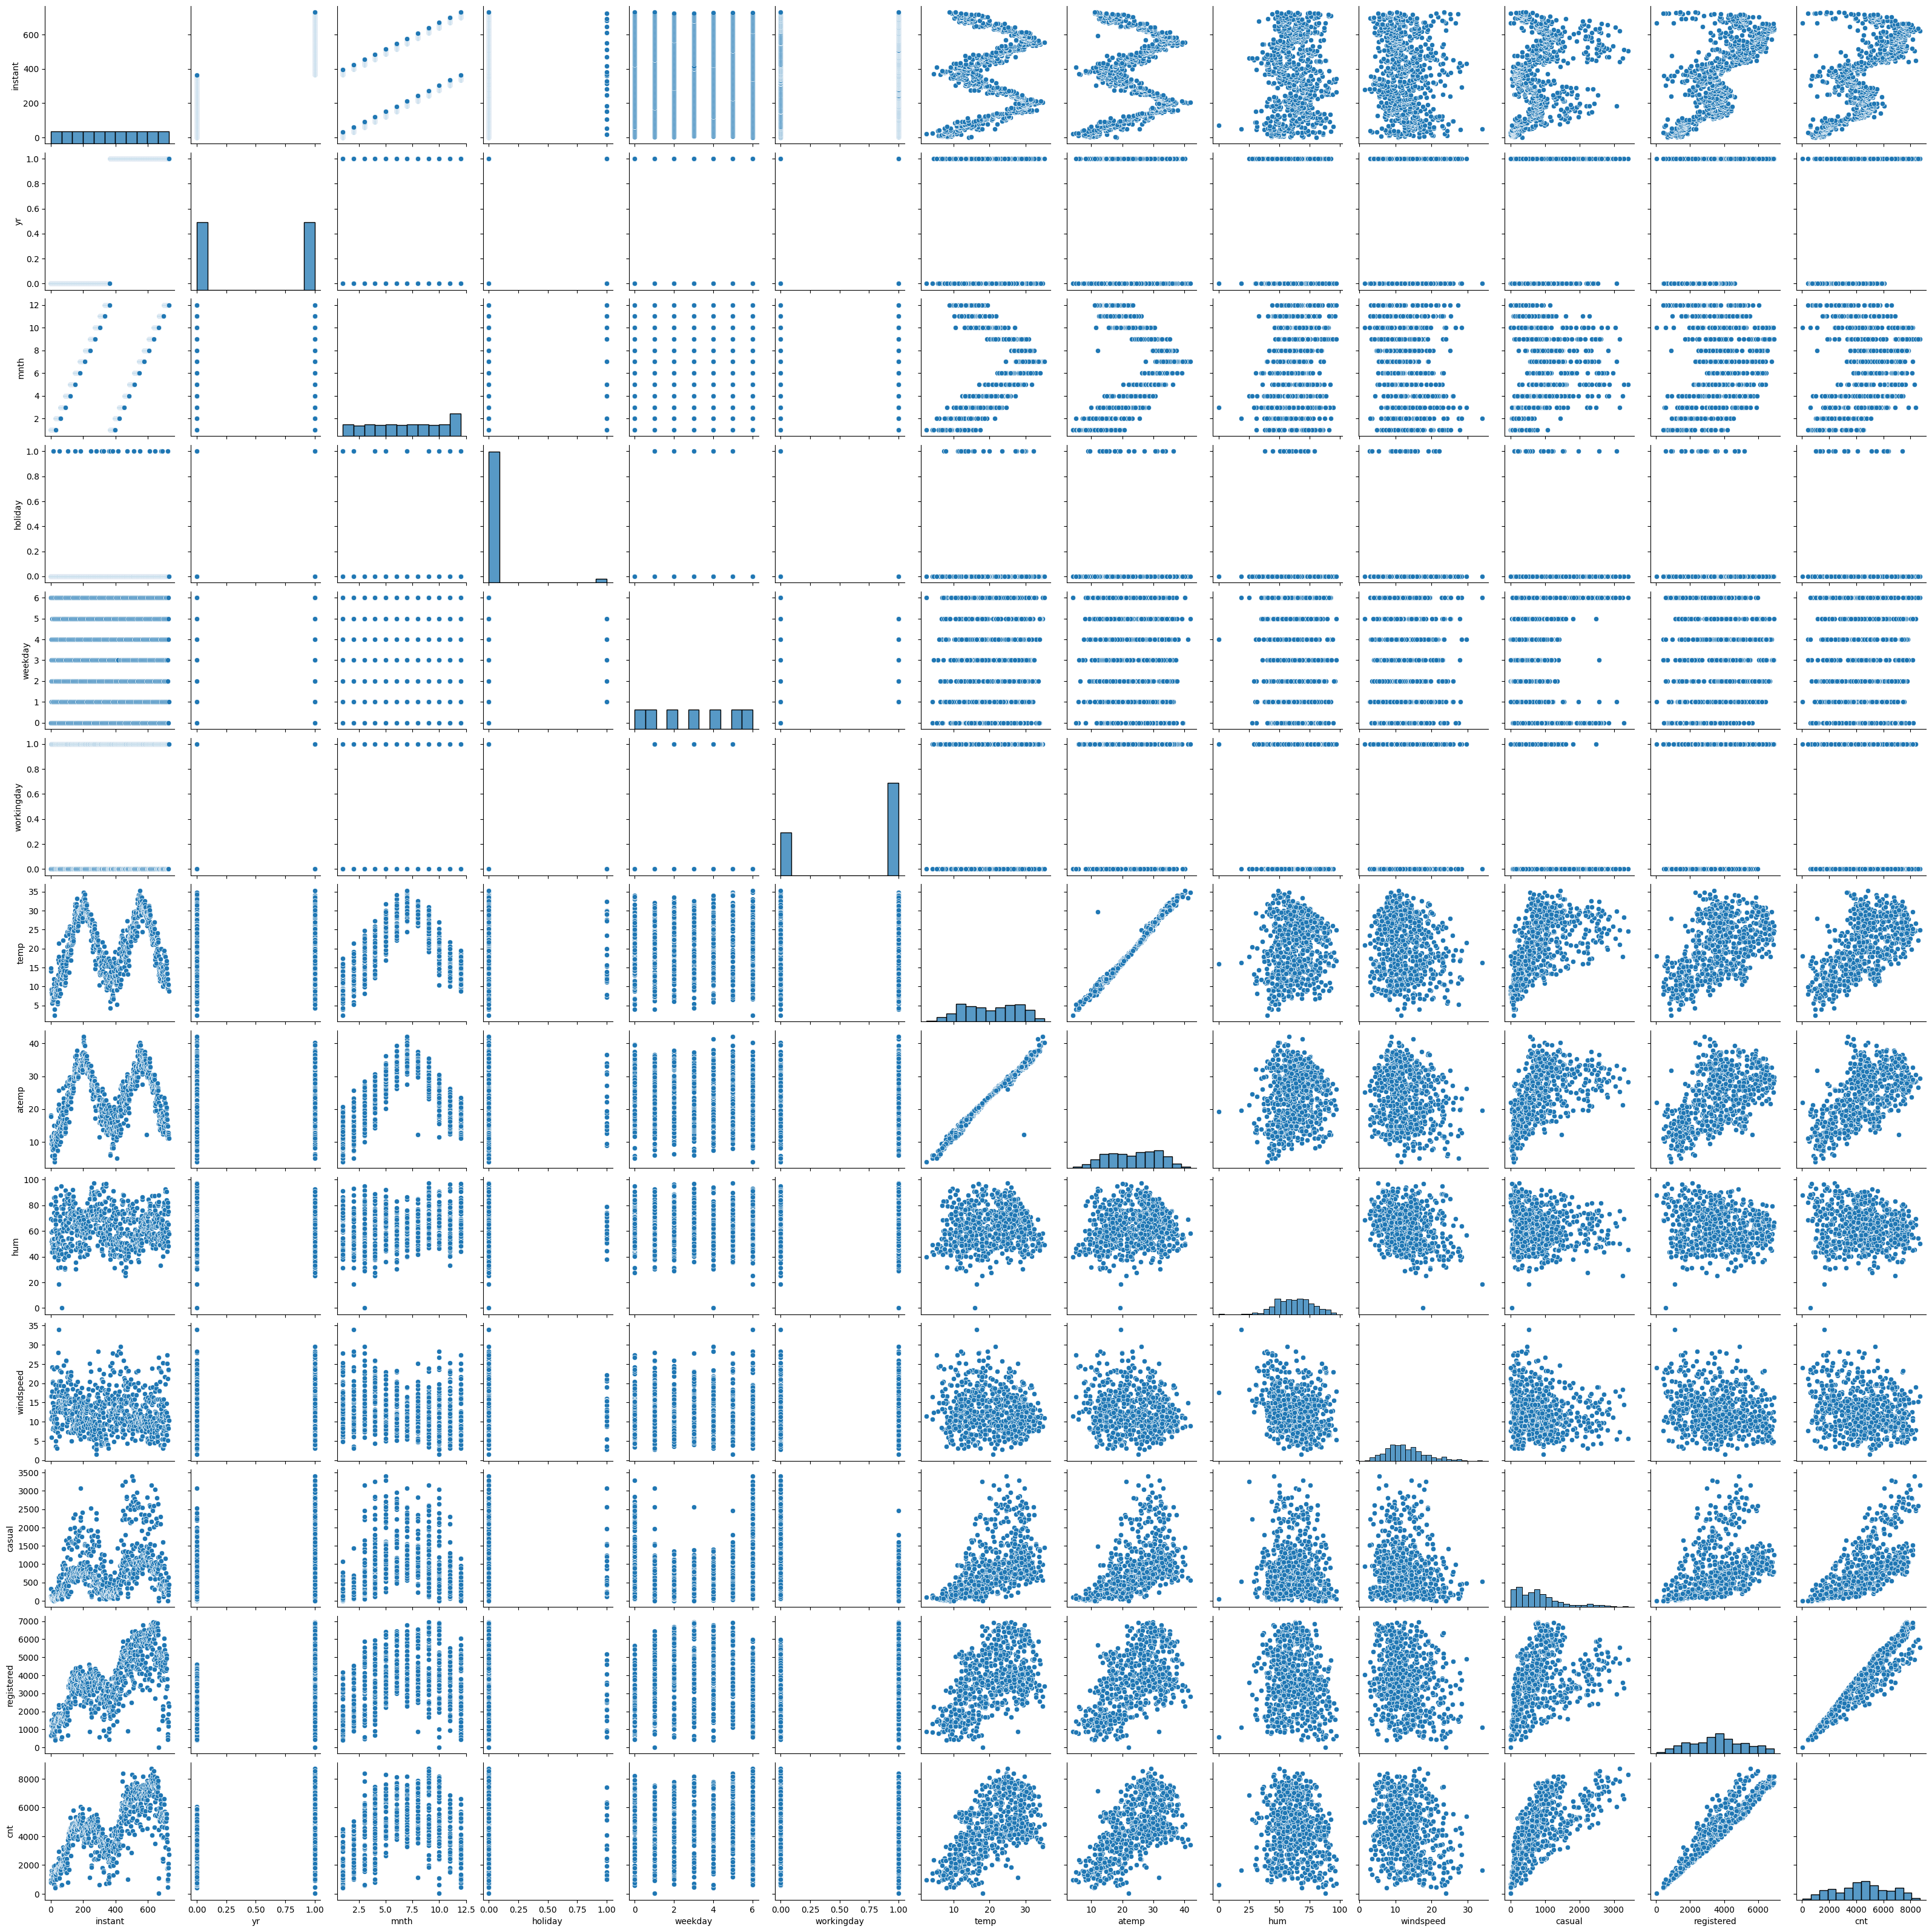

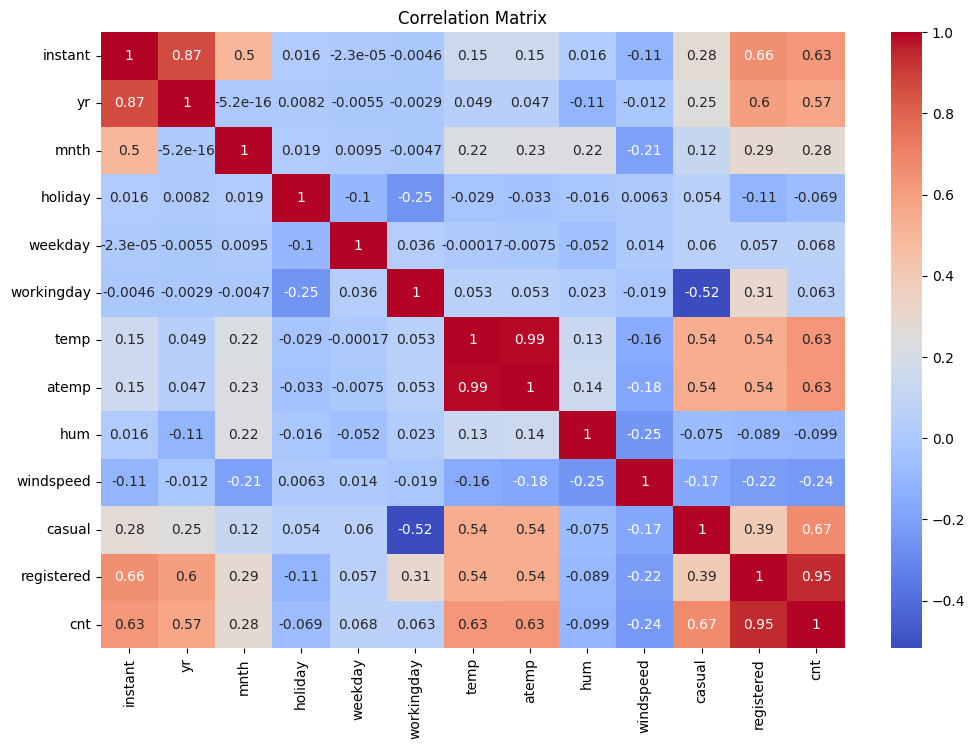

In [11]:
# Pairplot
sns.pairplot(numeric_data)
plt.show()

# Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [12]:
# Define features and target variable
X = data.drop(columns=['cnt', 'casual', 'registered', 'instant', 'dteday'])
y = data['cnt']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Initialize the Linear Regression model
lr = LinearRegression()

# Train the model
lr.fit(X_train, y_train)


LinearRegression()

In [14]:
# Predict on the test set
y_pred = lr.predict(X_test)

# Calculate RMSE and R-squared
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")


RMSE: 711.545513121542
R-squared: 0.8520828533826301


In [15]:
# Display model coefficients
coefficients = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


                            Coefficient
yr                          1987.528872
mnth                         -28.498682
holiday                     -491.400139
weekday                       67.858245
workingday                   134.016348
temp                         100.044562
atemp                         23.174857
hum                          -10.606921
windspeed                    -41.981107
season_spring               -977.844224
season_summer                245.221851
season_winter                802.730631
weathersit_light_rain_snow -2079.970126
weathersit_mist             -434.566939


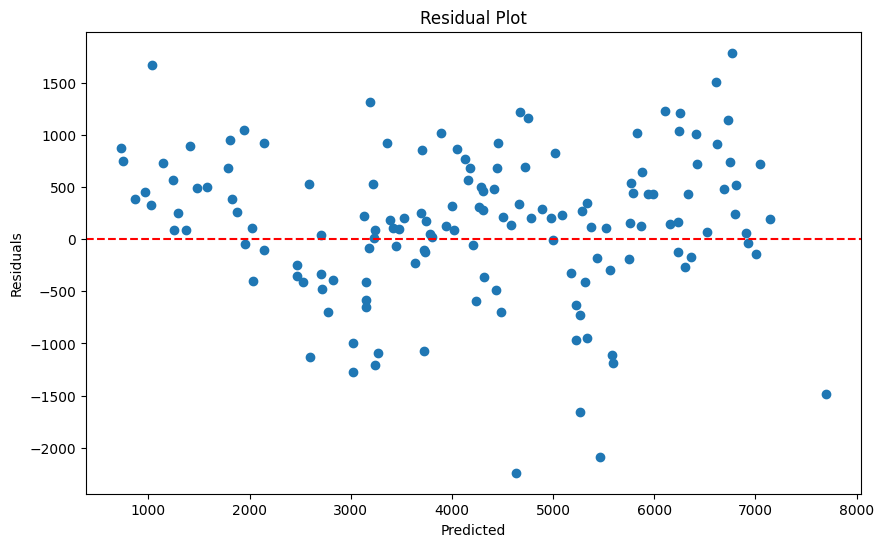

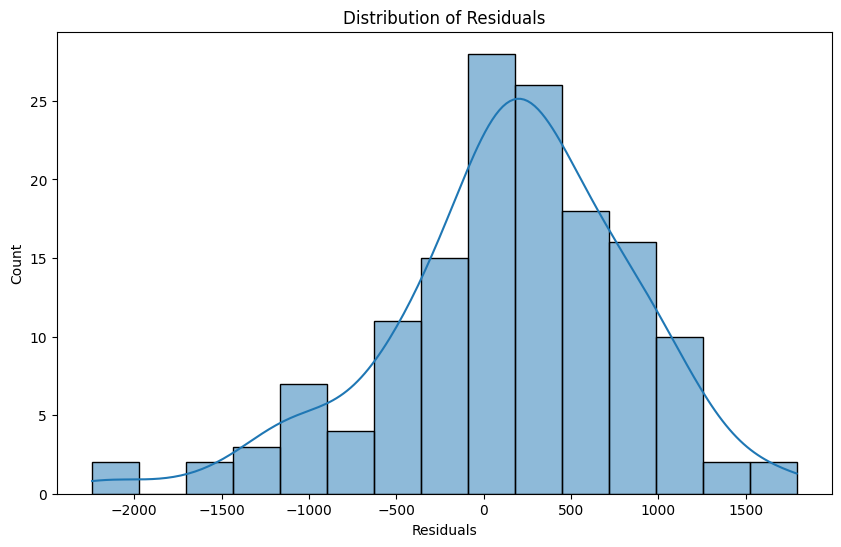

In [16]:
# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Plot distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()


In [18]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8520828533826301